In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import io

from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

# Settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [2]:
# Deklaration
path = "../Datasets/"

# Clean the Dataset, because bad Separator
with open(path + 'mushrooms.csv', encoding='utf-8') as f:
    data=f.read().replace(',', '|')
    
# Covert IO obj to Dataframe
dataIO = io.StringIO(data)
df = pd.read_csv(dataIO, 
                 sep='|',
                 decimal='.')

In [3]:
# Bereinigung des DFs
# Leere Spalten löschen
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(labels=unnamed_cols, axis=1)

# Leere Datensätze löschen
print('Datensatzlänge vor Bereinigung: ' + str(len(df)))
df = df.dropna()
print('Datensatzlänge nach Bereinigung: ' + str(len(df)))

Datensatzlänge vor Bereinigung: 8124
Datensatzlänge nach Bereinigung: 8124


In [4]:
# Write clean CSV
#df.to_csv(path + 'mushrooms_clean.csv',
#          index=False,
#          sep='|',
#          decimal='.')

#df = pd.read_csv(path + 'mushrooms_clean.csv',
#                 sep='|',
#                 decimal='.')

In [5]:
df.head(2)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g

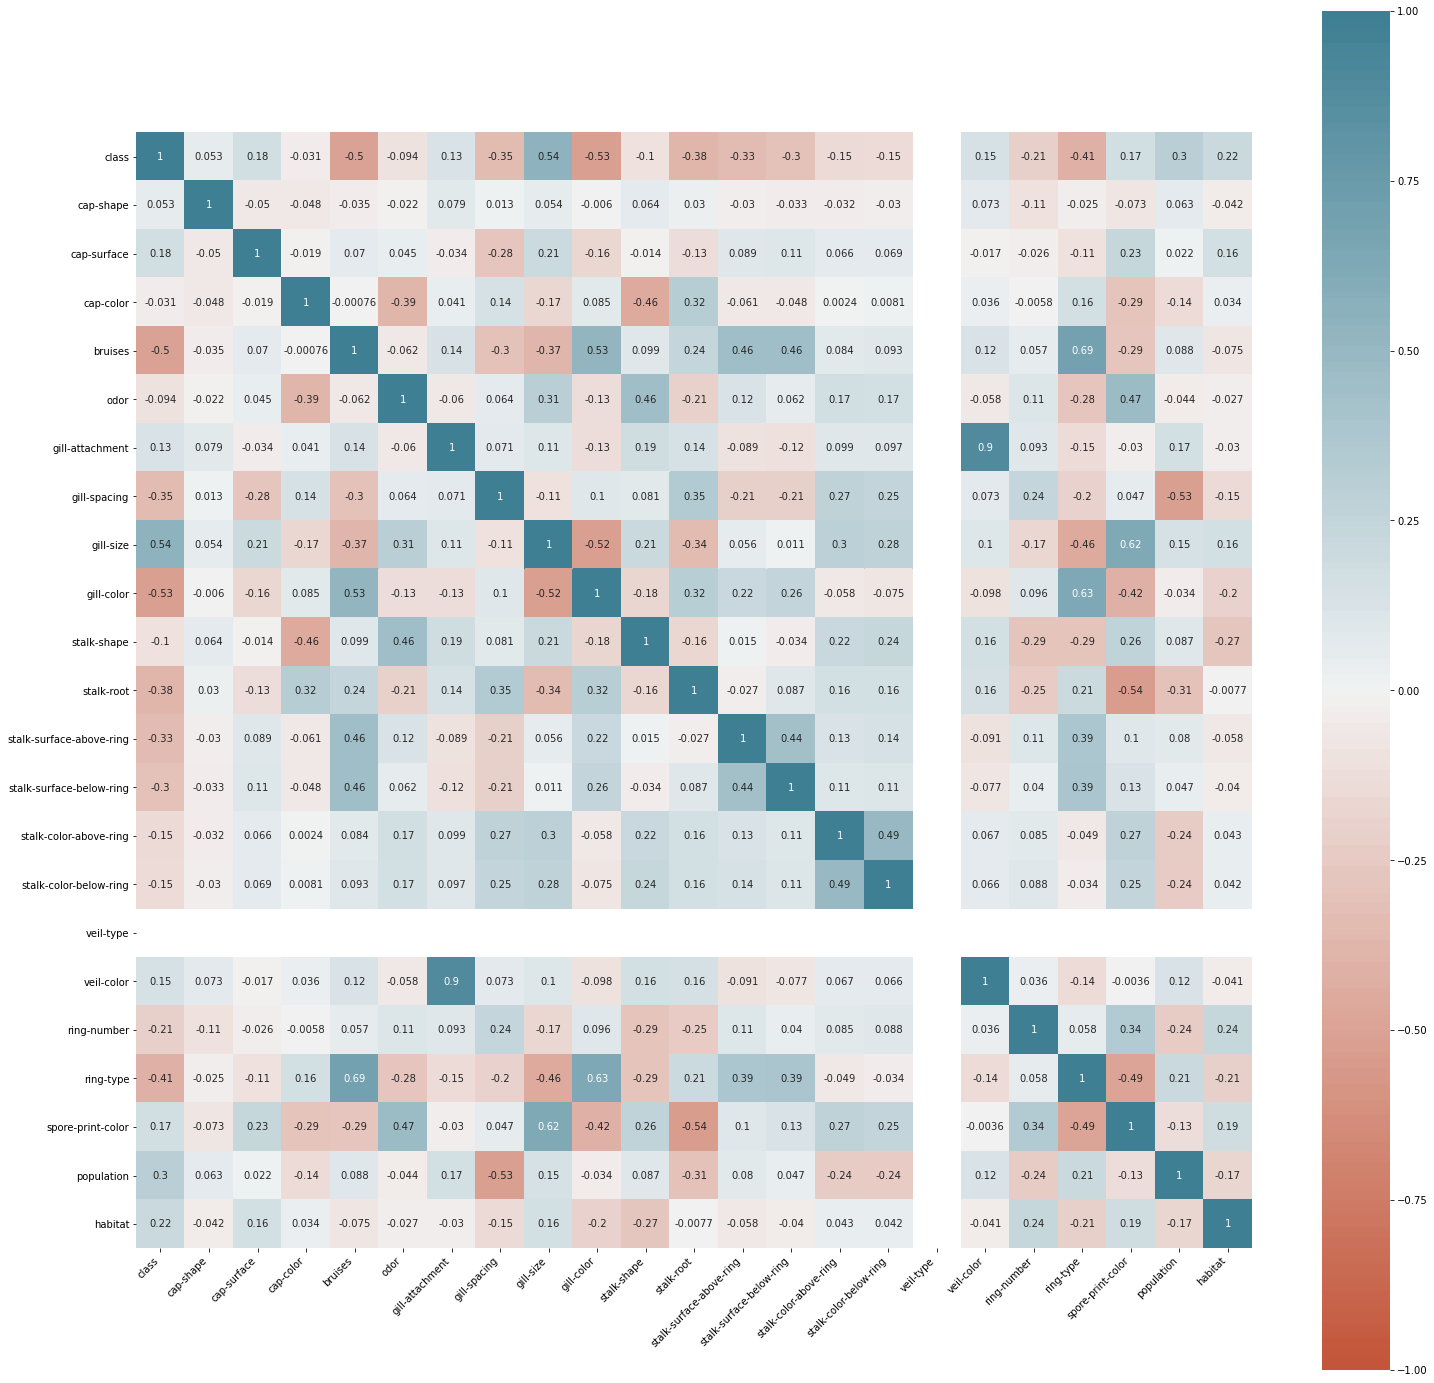

In [6]:
# Datenvorbereiten um Correlation zu berechen
for col in df.columns: 
    df[col]=df[col].astype('category').cat.codes


# Heatmap um Zusammenhänge zu erkennen
plt.subplots(figsize=(25,25))
ax = sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
clear_output(wait=True)